<Figure size 2560x1920 with 0 Axes>

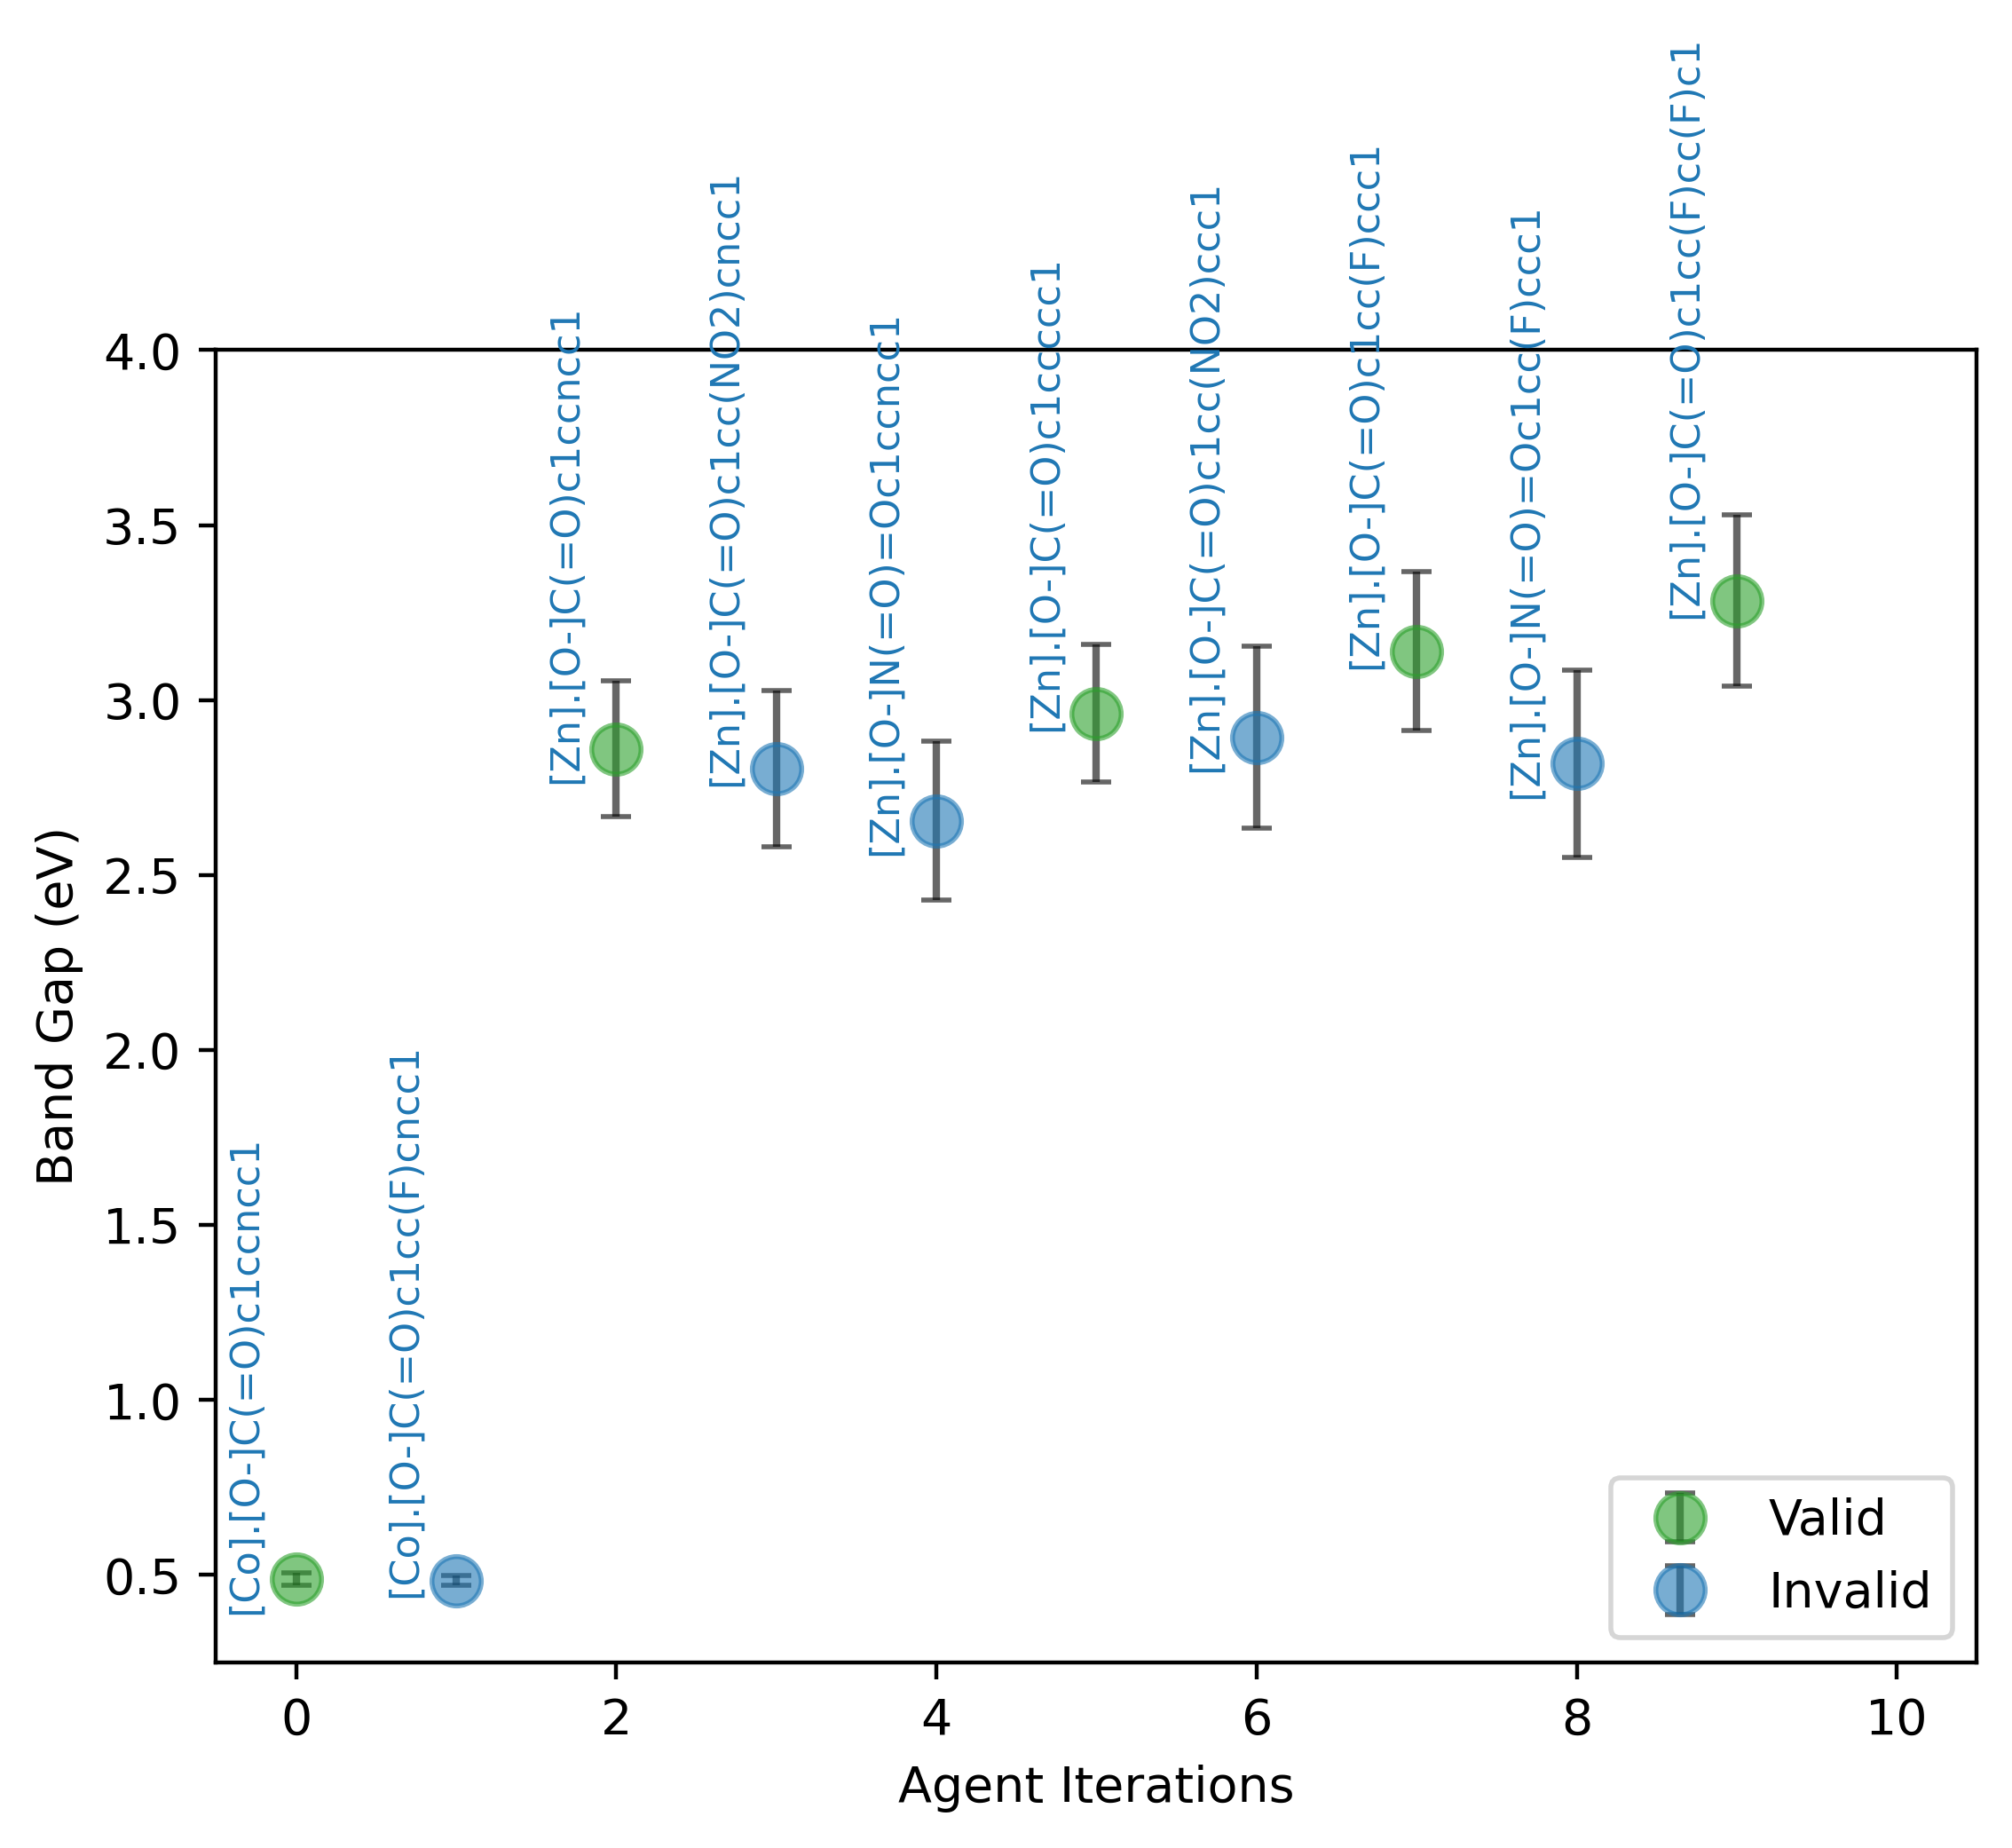

In [49]:
import matplotlib.pyplot as plt
import json

initial_smiles = '[Co].[O-]C(=O)c1ccncc1'
with open(f"../results/{initial_smiles}_unguided.json", "r") as json_file:
    iteration_data = json.load(json_file)

iterations = [item['iteration'] for item in iteration_data]
mean_band_gaps = [item['data']['Mean Band Gap'] for item in iteration_data]
std_band_gaps = [item['data']['STD Band Gap'] for item in iteration_data]
smiles_labels = [item['data']['SMILES'] for item in iteration_data]
chemical_feasibilities = [item['data']['Chemical Feasibility'] for item in iteration_data]

plt.figure(dpi=400)

colors = ['C2' if feas == 'Valid' else 'C0' for feas in chemical_feasibilities]

# Plot with error bars and color-coded points
plt.figure(dpi=400)
for i, (x, y, yerr, color) in enumerate(zip(iterations, mean_band_gaps, std_band_gaps, colors)):
    plt.errorbar(x, y, yerr=yerr, fmt='o', color=color, ecolor='k',
                 capsize=3, linestyle='None', alpha=0.6, markersize=10, label=chemical_feasibilities[i])



vertical_offsets = [(-10 + 5 * (i % 2)) for i in range(len(iterations))]  # Alternating vertical offsets

for x, y, label, offset in zip(iterations, mean_band_gaps, smiles_labels, vertical_offsets):
    plt.text(x-0.2, y + offset/100, label, verticalalignment='bottom', 
             horizontalalignment='right', fontsize=8, color='C0', rotation=90)

ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys(), loc="lower right")

plt.xlabel('Agent Iterations')
plt.xlim([-0.5,10.5])
plt.ylim([0.25, 4])
plt.ylabel('Band Gap (eV)')
plt.savefig(f"../results/{iteration_data[0]['data']['SMILES']}_unguided.png")

<Figure size 2560x1920 with 0 Axes>

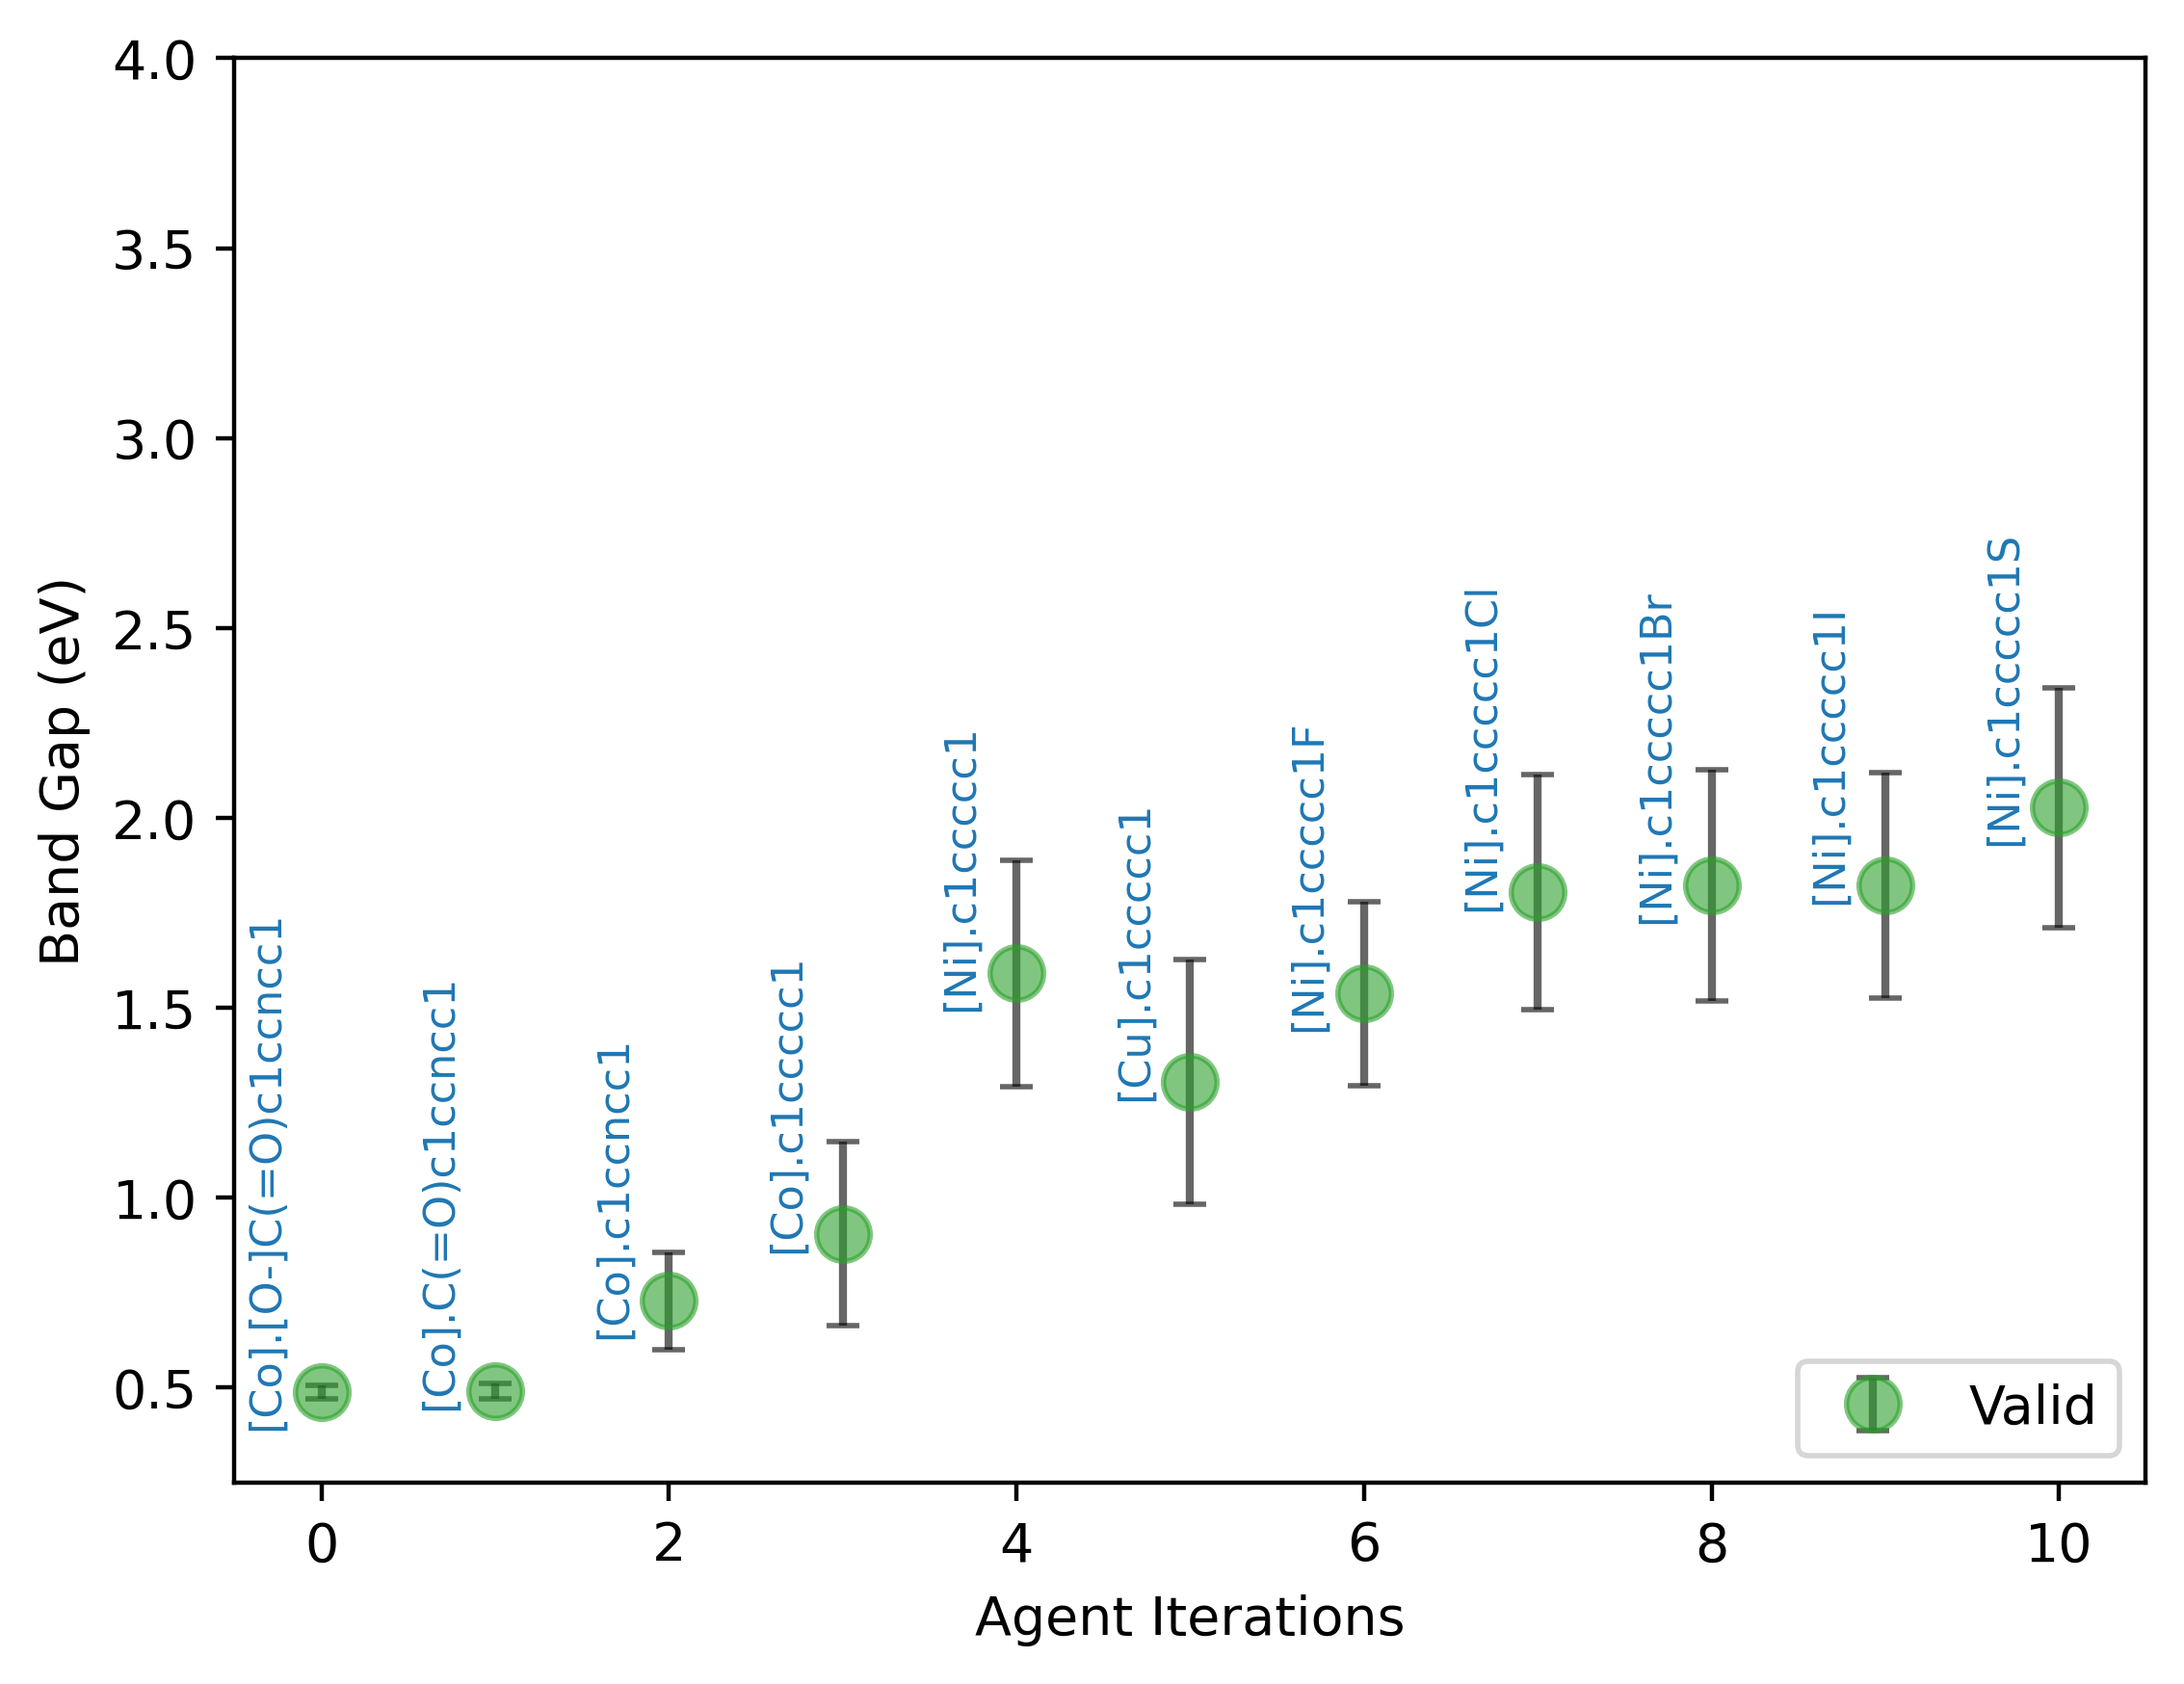

In [50]:
initial_smiles = '[Co].[O-]C(=O)c1ccncc1'
with open(f"../results/{initial_smiles}_guided.json", "r") as json_file:
    iteration_data = json.load(json_file)

iterations = [item['iteration'] for item in iteration_data]
mean_band_gaps = [item['data']['Mean Band Gap'] for item in iteration_data]
std_band_gaps = [item['data']['STD Band Gap'] for item in iteration_data]
smiles_labels = [item['data']['SMILES'] for item in iteration_data]
chemical_feasibilities = [item['data']['Chemical Feasibility'] for item in iteration_data]

plt.figure(dpi=400)

colors = ['C2' if feas == 'Valid' else 'C0' for feas in chemical_feasibilities]

# Plot with error bars and color-coded points
plt.figure(dpi=400)
for i, (x, y, yerr, color) in enumerate(zip(iterations, mean_band_gaps, std_band_gaps, colors)):
    plt.errorbar(x, y, yerr=yerr, fmt='o', color=color, ecolor='k',
                 capsize=3, linestyle='None', alpha=0.6, markersize=10, label=chemical_feasibilities[i])



vertical_offsets = [(-10 + 5 * (i % 2)) for i in range(len(iterations))]  # Alternating vertical offsets

for x, y, label, offset in zip(iterations, mean_band_gaps, smiles_labels, vertical_offsets):
    plt.text(x-0.2, y + offset/100, label, verticalalignment='bottom', horizontalalignment='right', fontsize=8, color='C0', rotation=90)

ax=plt.gca()
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

plt.legend(by_label.values(), by_label.keys(), loc="lower right")

plt.xlabel('Agent Iterations')
plt.xlim([-0.5,10.5])
plt.ylim([0.25, 4])
plt.ylabel('Band Gap (eV)')

plt.savefig(f"../results/{iteration_data[0]['data']['SMILES']}_guided.png")

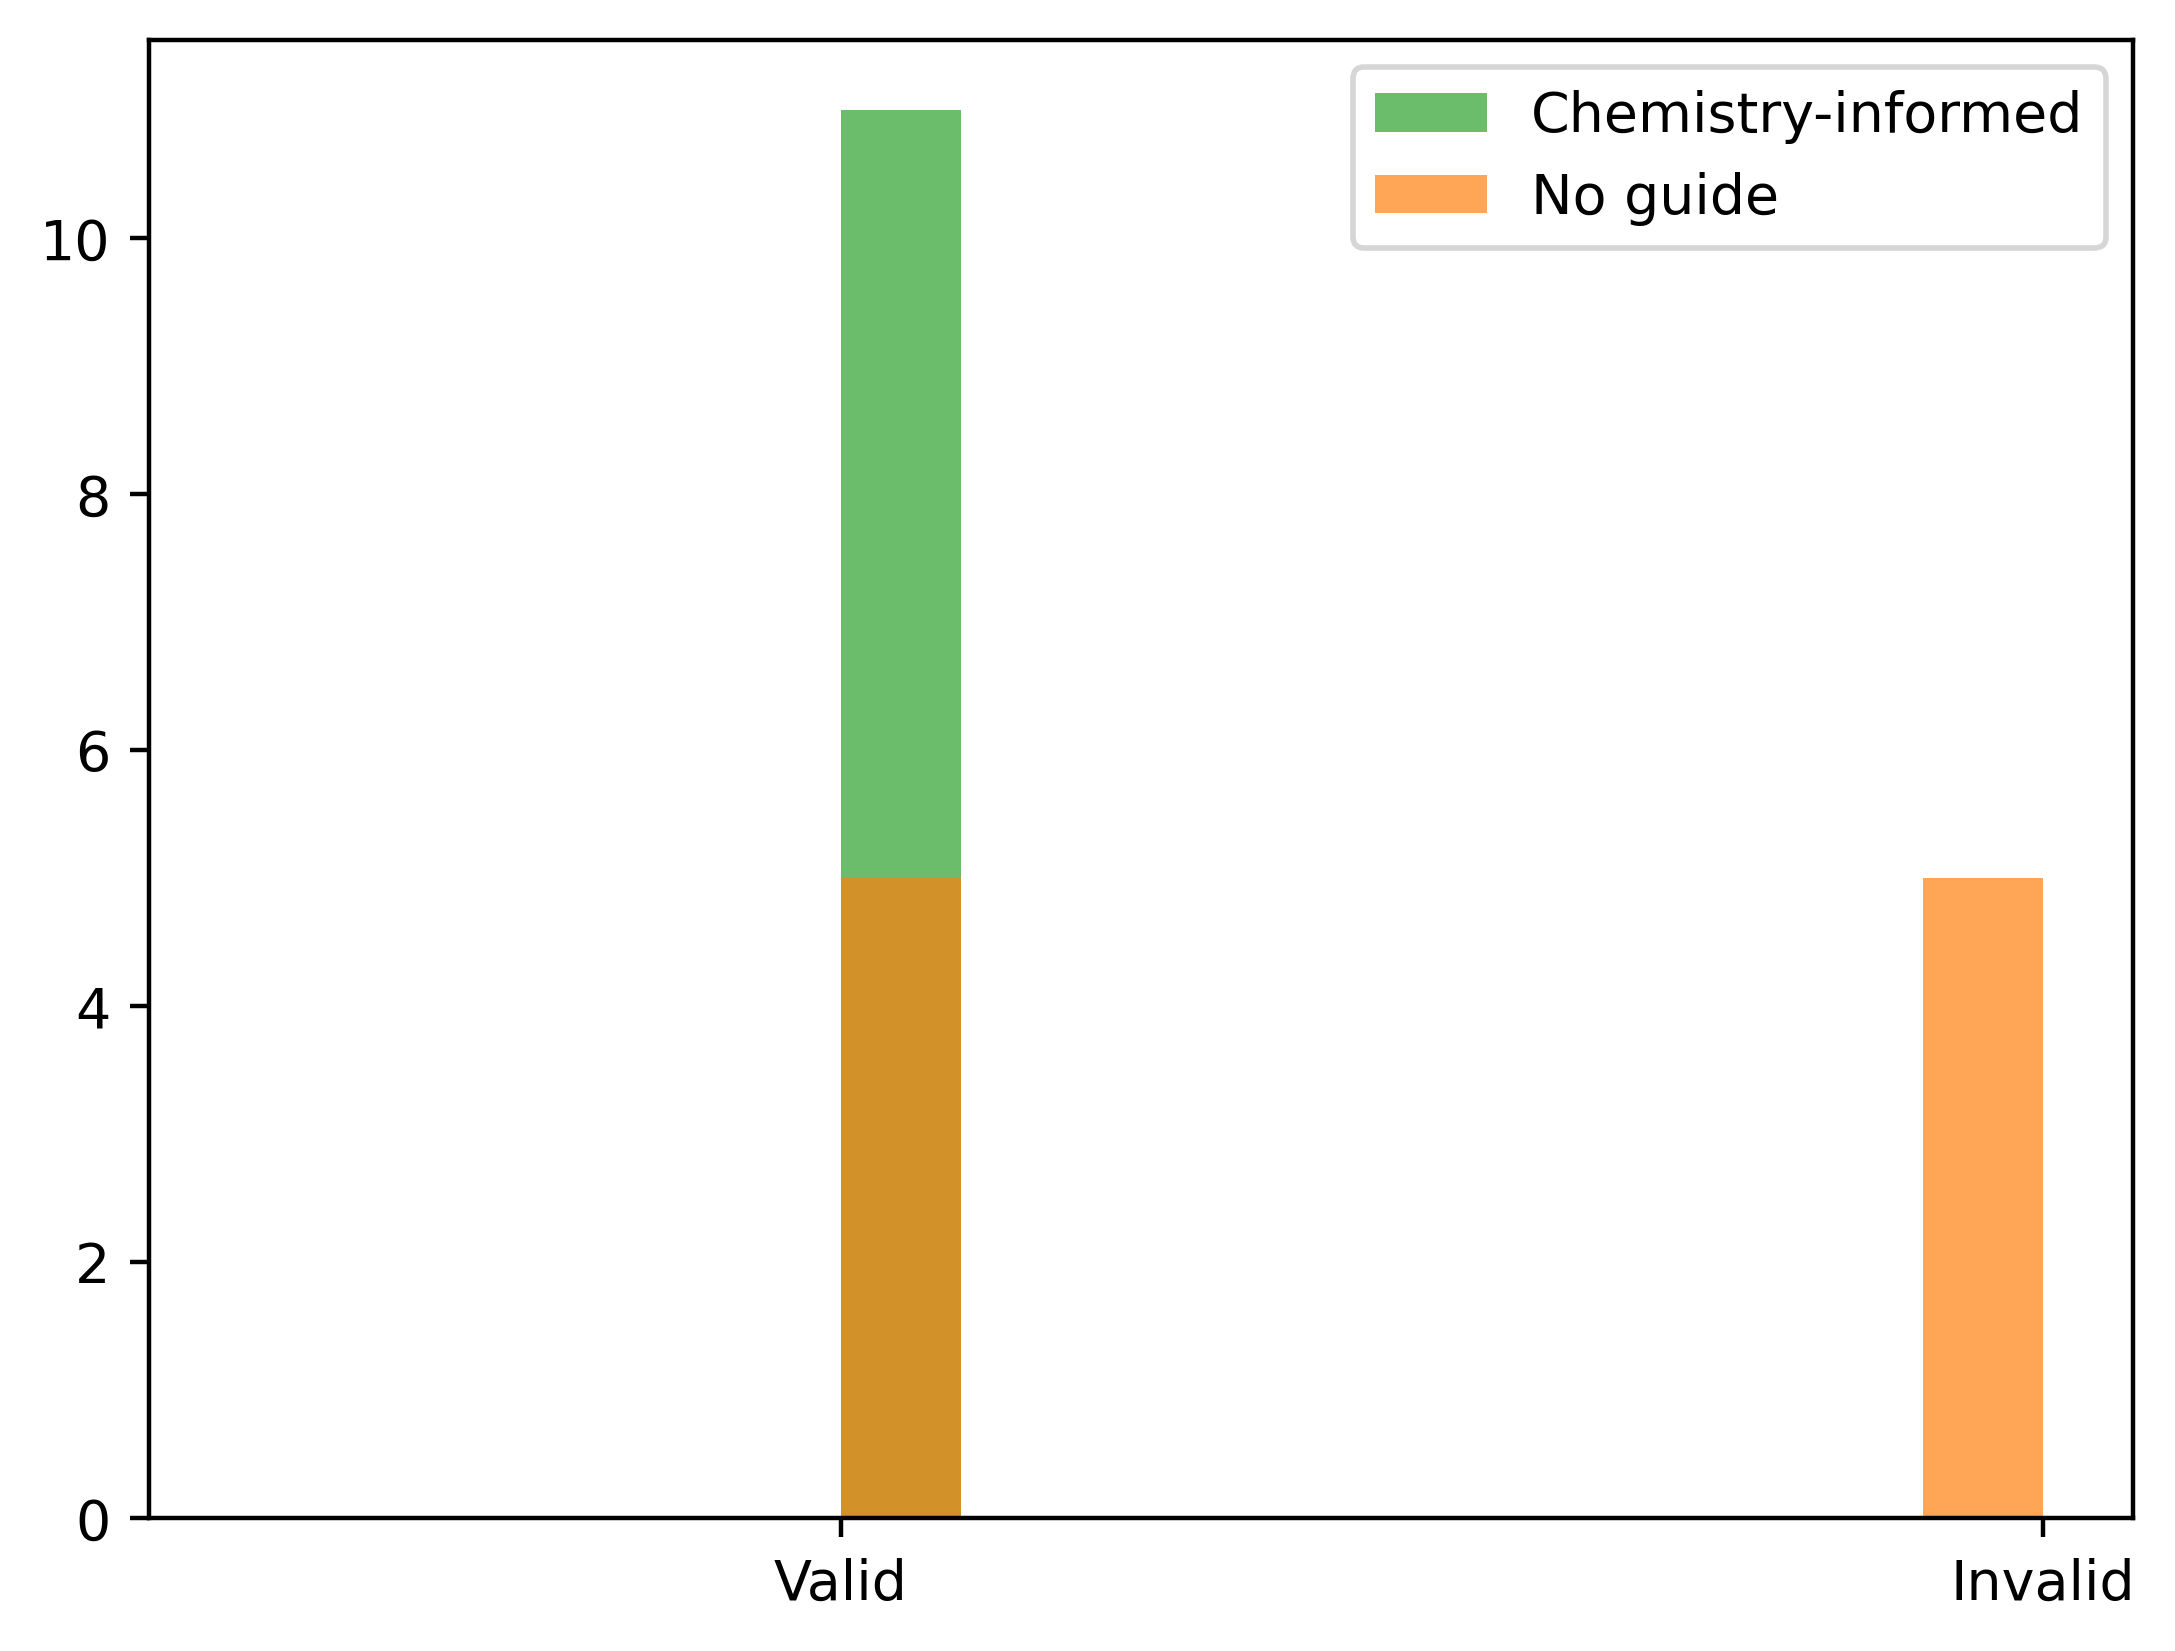

In [51]:
initial_smiles = '[Co].[O-]C(=O)c1ccncc1'
with open(f"../results/{initial_smiles}_guided.json", "r") as json_file:
    iteration_data = json.load(json_file)


chemical_feasibilities_guided = [item['data']['Chemical Feasibility'] for item in iteration_data]

with open(f"../results/{initial_smiles}_unguided.json", "r") as json_file:
    iteration_data = json.load(json_file)
    
plt.figure(dpi=400)
alpha=0.7
chemical_feasibilities_unguided = [item['data']['Chemical Feasibility'] for item in iteration_data]
plt.hist(chemical_feasibilities_guided, alpha=alpha, color='C2', label='Chemistry-informed')
plt.hist(chemical_feasibilities_unguided, alpha=alpha, color='C1', label='No guide')
plt.legend()

plt.savefig(f"../results/validity.png")
